Loading the final trained BTC model...
Model loaded successfully.


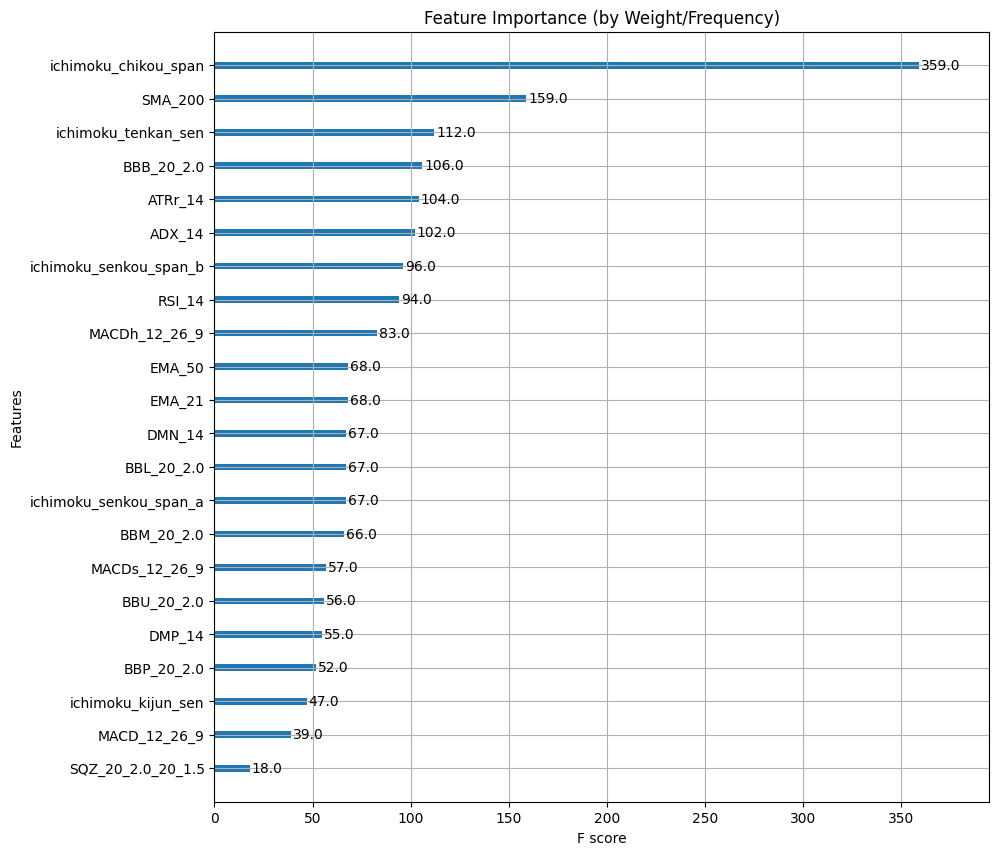

In [1]:
# In notebooks/9-Feature_Importance.ipynb

# Cell 1: Load Model and Plot Feature Importance

import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

print("Loading the final trained BTC model...")
# Ensure the path correctly points to your final BTC model
model_path = '../models/btc_usd_h4_xgb.pkl'

try:
    # Load the trained model from the file
    model = joblib.load(model_path)
    print("Model loaded successfully.")
    
    # --- Plot Feature Importance ---
    # Set the size of the plot for better readability
    plt.rcParams['figure.figsize'] = [10, 10]
    
    # Create the plot using xgboost's built-in function
    # 'weight' is one way to measure importance: how many times a feature was used to split the data.
    xgb.plot_importance(model, importance_type='weight', title='Feature Importance (by Weight/Frequency)')
    
    # Show the plot
    plt.show()

except FileNotFoundError:
    print(f"ERROR: Model file not found at '{model_path}'. Please ensure you have run the training notebook first.")
except Exception as e:
    print(f"An error occurred: {e}")

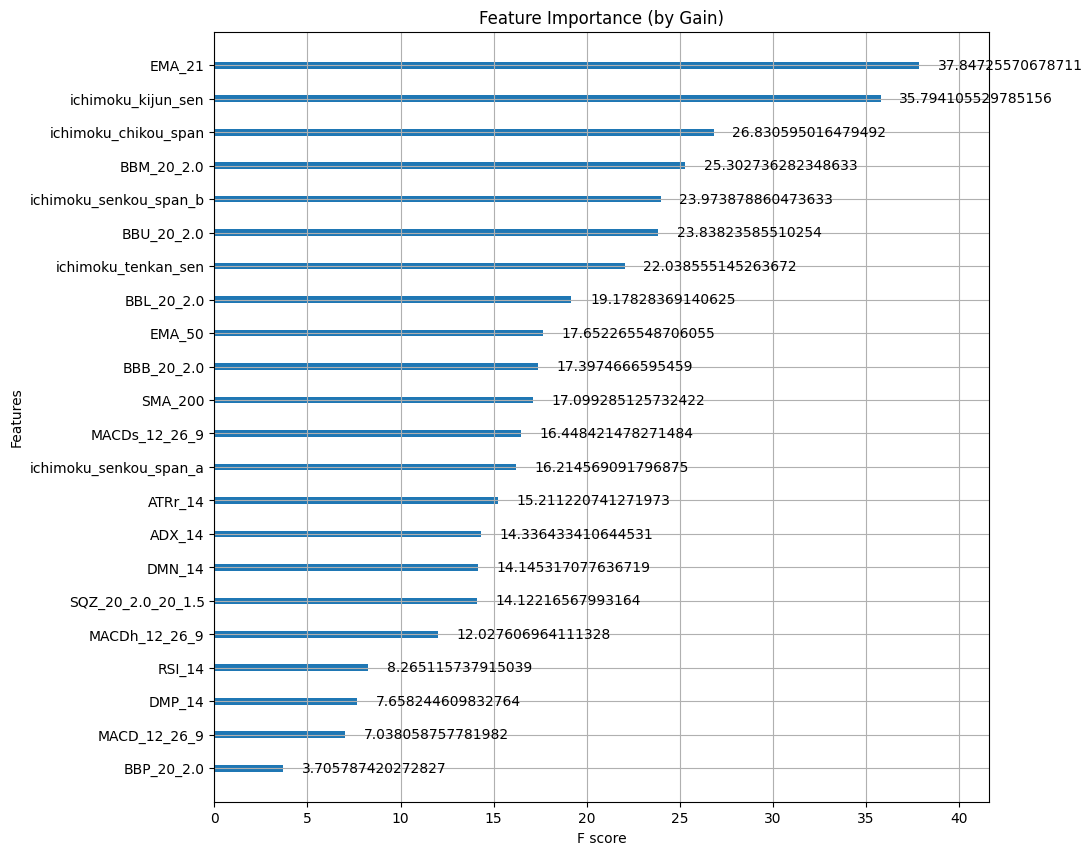

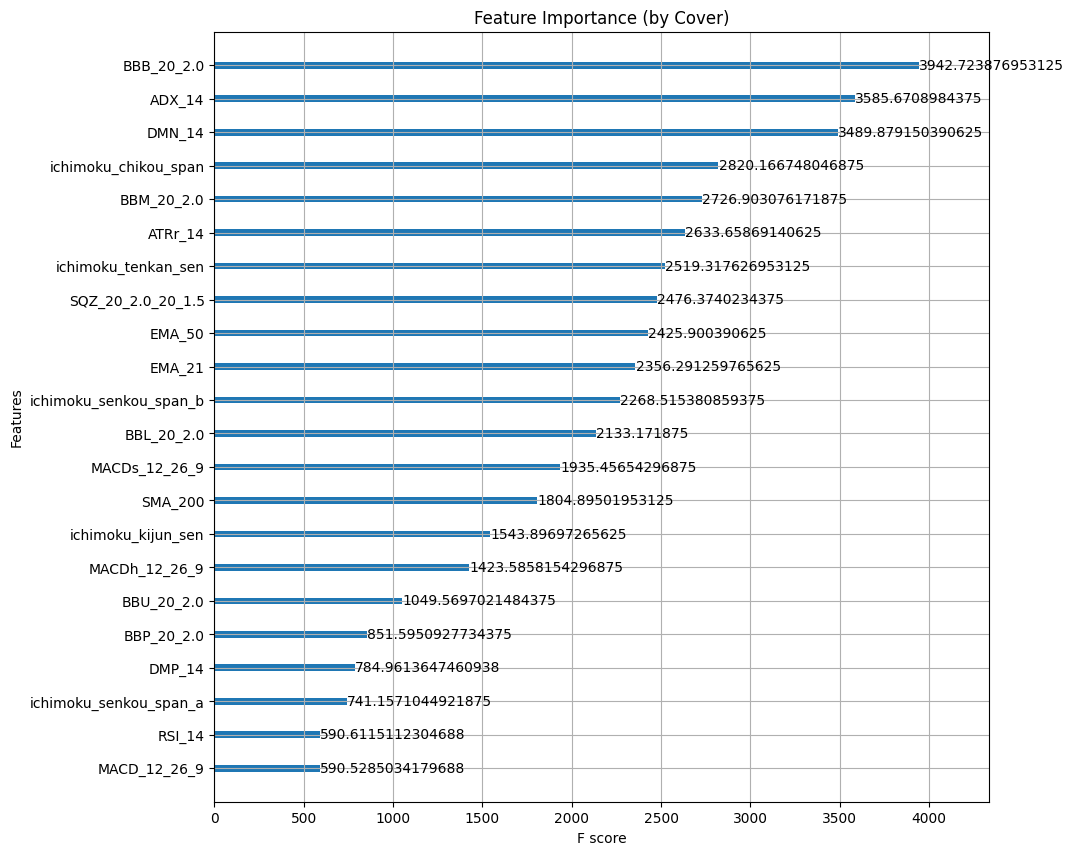

In [2]:
# Cell 2: Alternative Importance Metrics

try:
    # --- Plotting by 'gain' ---
    # This measures the average training loss reduction gained when using this feature. Often the most insightful.
    xgb.plot_importance(model, importance_type='gain', title='Feature Importance (by Gain)')
    plt.show()

    # --- Plotting by 'cover' ---
    # This measures the number of samples affected by splits on this feature.
    xgb.plot_importance(model, importance_type='cover', title='Feature Importance (by Cover)')
    plt.show()

except NameError:
    print("Model was not loaded in the first cell. Please run the first cell successfully.")
except Exception as e:
    print(f"An error occurred: {e}")